In [7]:
# Importar las librerías a utilizar para la exploración inicial de datos.
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import quote

# Librerías para árboles de decisión
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler

# Librerías para regresión logística
import statsmodels.api as sm
import statsmodels.formula.api as smf

import os
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from googletrans import Translator
from deep_translator import GoogleTranslator
from translate import Translator
from translatepy import Translator

# Descargar recursos necesarios de nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\QY539GE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\QY539GE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [8]:

# Levanto el CSV en un dataframe de pandas
Data = pd.read_csv('fraud_dataset.csv')

# muestro el head
print(Data.head())

   transaction_id transaction_amount     transaction_date transaction_type  \
0            1389              100.0  2024-01-23 20:39:32         in_store   
1           23946                NaN  2024-01-05 11:06:51           online   
2            8296             1000.0  2024-01-14 13:36:11           online   
3           28145   836.010919100131  2024-01-26 03:15:20       withdrawal   
4           14861  54.17990548903373  2024-01-23 20:02:05         in_store   

  merchant_location currency  merchant_id merchant_category payment_method  \
0        Lake Donna      EUR        96971       electronics    contactless   
1    West Kariburgh      usd        88047       restaurants    contactless   
2     East Kimberly      USD        88312         groceries           chip   
3       Janeborough      USD        92701       Electronics           chip   
4  Lake Jessicaberg      EUR        89010       Electronics    contactless   

   customer_id  customer_age customer_gender  purchase_history

In [9]:
Data.shape

(20043, 20)

In [10]:
# Listas las columnas disponibles
print('Las columnas disponibles en el dataset son:')
Data.columns

Las columnas disponibles en el dataset son:


Index(['transaction_id', 'transaction_amount', 'transaction_date',
       'transaction_type', 'merchant_location', 'currency', 'merchant_id',
       'merchant_category', 'payment_method', 'customer_id', 'customer_age',
       'customer_gender', 'purchase_history', 'monthly_spending_avg',
       'credit_limit', 'current_balance', 'ip_address', 'device_used',
       'transaction_frequency', 'is_fraud'],
      dtype='object')

In [11]:
#Analizo el data frame para ver detalles de las columnas.
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20043 entries, 0 to 20042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   transaction_id         20043 non-null  int64  
 1   transaction_amount     17643 non-null  object 
 2   transaction_date       20043 non-null  object 
 3   transaction_type       19184 non-null  object 
 4   merchant_location      18416 non-null  object 
 5   currency               20043 non-null  object 
 6   merchant_id            20043 non-null  int64  
 7   merchant_category      20043 non-null  object 
 8   payment_method         20043 non-null  object 
 9   customer_id            20043 non-null  int64  
 10  customer_age           17269 non-null  float64
 11  customer_gender        20043 non-null  object 
 12  purchase_history       20043 non-null  int64  
 13  monthly_spending_avg   20043 non-null  float64
 14  credit_limit           20043 non-null  int64  
 15  cu

In [12]:
#Analizo el data frame para ver detalles de las columnas.
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,20043.0,14179.676446,8129.766588,1.00,7237.0000,14112.00,21191.00,28348.00
merchant_id,20043.0,54819.700145,25798.856764,10012.00,32732.5000,54988.00,77034.00,99992.00
customer_id,20043.0,5490.219428,2574.488135,1000.00,3250.0000,5476.00,7700.00,9995.00
customer_age,17269.0,34.564074,9.621739,18.00,28.0000,34.00,41.00,70.00
purchase_history,20043.0,10.031333,3.189569,1.00,8.0000,10.00,12.00,24.00
monthly_spending_avg,20043.0,457.083912,243.452705,79.52,287.0400,404.70,566.34,2403.47
credit_limit,20043.0,10542.628998,5491.340585,1000.00,5735.0000,10606.00,15309.00,19998.00
current_balance,17976.0,9980.538925,5796.872456,2.87,4950.4425,9902.61,14977.87,19999.79
transaction_frequency,20043.0,5.039715,2.265181,0.00,3.0000,5.00,6.00,16.00
is_fraud,20043.0,0.303298,0.459694,0.00,0.0000,0.00,1.00,1.00


In [13]:
#Analizo el data frame para ver detalles de las columnas.
Data.describe(include=['object']).T

,count,unique,top,freq
transaction_amount,17643,7123,2000.0,1078
transaction_date,20043,19814,2024-01-08 04:10:40,3
transaction_type,19184,3,online,11330
merchant_location,18416,8115,West Michael,27
currency,20043,6,USD,12300
merchant_category,20043,6,electronics,7420
payment_method,20043,3,chip,10134
customer_gender,20043,4,Male,11039
ip_address,20043,11340,91.105.128.117,4
device_used,20043,5,mobile,12910


In [14]:
#Analizo el data frame para ver samples de las columnas.
Data.sample(15)

,transaction_id,transaction_amount,transaction_date,transaction_type,merchant_location,currency,merchant_id,merchant_category,payment_method,customer_id,customer_age,customer_gender,purchase_history,monthly_spending_avg,credit_limit,current_balance,ip_address,device_used,transaction_frequency,is_fraud
13742,24208,574.4359853119229,2024-02-13 09:48:37,online,Georgeburgh,USD,48354,restaurants,chip,7238,NaN,Male,8,361.67,7944,13163.13,140.100.222.222,mobile,7,0
17816,18434,NaN,2024-03-22 01:24:42,in_store,Armstrongville,USD,40283,electronics,chip,6366,29.0,Male,6,377.96,1114,19801.11,179.71.8.92,mobile,5,0
437,16142,1262.7714558597686,2024-01-03 23:26:42,online,North Tyler,USD,33479,restaurants,contactless,2453,38.0,FEMALE,10,360.15,6687,NaN,92.81.212.169,tablet,4,0
5358,18687,32.98871634956165,2024-01-14 12:24:18,withdrawal,Lake Suzanneview,EUR,50206,electronics,chip,5182,34.0,Male,11,105.76,10790,14226.25,139.226.209.24,mobile,7,0
17616,2282,1487.5311007570147,2024-03-01 08:46:36,online,Elizabethstad,USD,23087,groceries,contactless,9765,41.0,Female,5,687.06,17206,6869.55,40.152.188.19,mobile,7,0
15015,13115,NaN,2024-02-09 16:33:21,online,Loveberg,USD,53294,restaurants,contactless,5166,41.0,Male,12,359.81,15020,NaN,130.179.37.118,mobile,4,0
14598,24426,158.9046946090366,2024-02-03 00:03:08,in_store,Christopherburgh,USD,46278,electronics,chip,2906,35.0,Female,10,532.92,9598,10928.65,17.52.29.91,desktop,9,0
2472,1180,976.1391396979221,2024-01-02 05:05:42,online,East Crystal,EUR,22322,electronics,chip,1435,37.0,Female,7,591.68,11213,4536.53,35.61.101.178,mobile,6,0
1068,13484,NaN,2024-01-28 22:32:36,withdrawal,Nguyenchester,EUR,95040,travel,contactless,7044,47.0,Female,7,287.33,18669,1804.08,26.40.5.153,mobile,5,0
8841,1259,2516.466867251628,2024-01-09 08:14:39,online,Port Jessica,EUR,45401,restaurants,chip,4431,30.0,Male,11,167.56,5150,2700.18,3.191.159.242,mobile,5,0


In [15]:
# Valores unicos de las variables categoricas
Data.select_dtypes(include=['object']).apply(pd.unique)

transaction_amount    [100.0, nan, 1000.0, 836.010919100131, 54.1799...
transaction_date      [2024-01-23 20:39:32, 2024-01-05 11:06:51, 202...
transaction_type                    [in_store, online, withdrawal, nan]
merchant_location     [Lake Donna, West Kariburgh, East Kimberly, Ja...
currency                                  [EUR, usd, USD, US, GBP, gbp]
merchant_category     [electronics, restaurants, groceries, Electron...
payment_method                     [contactless, chip, magnetic_stripe]
customer_gender                               [Female, Male, FEMALE, M]
ip_address            [67.20.93.223, 182.126.136.76, 179.9.25.40, 12...
device_used                       [mobile, desktop, Phone, TAB, tablet]
dtype: object

Amount no puede ser object convertir a float
limpiar currency, category, gender, device


## Limpieza de datos

In [16]:
#Verifico si tengo algun NaN
has_nans = Data.isna().any().any()

check = "Yes" if has_nans else "No"


# Printeo el resultado del analiss
print(f"Hay Algun 'Nan' en el DataFrame? {check}")

Hay Algun 'Nan' en el DataFrame? Yes


In [17]:
Data.isnull().sum()

transaction_id              0
transaction_amount       2400
transaction_date            0
transaction_type          859
merchant_location        1627
currency                    0
merchant_id                 0
merchant_category           0
payment_method              0
customer_id                 0
customer_age             2774
customer_gender             0
purchase_history            0
monthly_spending_avg        0
credit_limit                0
current_balance          2067
ip_address                  0
device_used                 0
transaction_frequency       0
is_fraud                    0
dtype: int64

drop transaction amount NAN
merchant location NA
transaction type moda
customer age media
current balance mediana

In [18]:
print(Data['transaction_amount'].infer_objects()[:30])

0                  100.0
1                    NaN
2                 1000.0
3       836.010919100131
4      54.17990548903373
5                    NaN
6      8495.724782070563
7                 1500.0
8     484.11935235848694
9                    NaN
10     48.19812386589951
11     49465.67083529911
12                1000.0
13    2834.2146396139565
14    2158.1426065143664
15                 500.0
16     210.0801520941389
17    38.555796849945644
18      629.589373453229
19    1413.1399962719536
20    1800.9110408730094
21     768.5230970456101
22     1119.944543561217
23     459.3124005312254
24      364.829420229356
25     775.2819324018697
26     28.06393370595047
27     483.5197032861713
28                   NaN
29    43.266496611752515
Name: transaction_amount, dtype: object


In [19]:
import re
# Función para detectar valores no numéricos
def es_numerico(valor):
    try:
        float(valor)
        return True
    except ValueError:
        return False
# Filtrar valores no numéricos
valores_no_numericos = Data[~Data['transaction_amount'].apply(es_numerico)]
print(valores_no_numericos[['transaction_id', 'transaction_amount']])

       transaction_id   transaction_amount
50               8159   $54.34792829773312
60               4297  $249.49590398254773
111             20466  $1132.5203060067183
244             16115              $1000.0
256              3940   $252.7755136329105
...               ...                  ...
19880            4985              $1500.0
19896           28140  $1152.6162797425534
19950            8058    $1021.57909656008
19952           23471  $1152.6533614273108
20035            4740  $1899.9277517223065

[437 rows x 2 columns]


In [20]:
Data['transaction_amount'] = Data['transaction_amount'].astype(str).str.replace('$', '', regex=False)


In [21]:
Data['transaction_amount'] = Data.to_numeric(Data['transaction_amount'], errors='coerce')

AttributeError: 'DataFrame' object has no attribute 'to_numeric'

In [22]:
import re
# Función para detectar valores no numéricos
def es_numerico(valor):
    try:
        float(valor)
        return True
    except ValueError:
        return False
# Filtrar valores no numéricos
valores_no_numericos = Data[~Data['transaction_amount'].apply(es_numerico)]
print(valores_no_numericos[['transaction_id', 'transaction_amount']])

Empty DataFrame
Columns: [transaction_id, transaction_amount]
Index: []


In [23]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20043 entries, 0 to 20042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   transaction_id         20043 non-null  int64  
 1   transaction_amount     20043 non-null  object 
 2   transaction_date       20043 non-null  object 
 3   transaction_type       19184 non-null  object 
 4   merchant_location      18416 non-null  object 
 5   currency               20043 non-null  object 
 6   merchant_id            20043 non-null  int64  
 7   merchant_category      20043 non-null  object 
 8   payment_method         20043 non-null  object 
 9   customer_id            20043 non-null  int64  
 10  customer_age           17269 non-null  float64
 11  customer_gender        20043 non-null  object 
 12  purchase_history       20043 non-null  int64  
 13  monthly_spending_avg   20043 non-null  float64
 14  credit_limit           20043 non-null  int64  
 15  cu

In [24]:
Data

,transaction_id,transaction_amount,transaction_date,transaction_type,merchant_location,currency,merchant_id,merchant_category,payment_method,customer_id,customer_age,customer_gender,purchase_history,monthly_spending_avg,credit_limit,current_balance,ip_address,device_used,transaction_frequency,is_fraud
0,1389,100.0,2024-01-23 20:39:32,in_store,Lake Donna,EUR,96971,electronics,contactless,5205,44.0,Female,8,412.01,13047,1956.78,67.20.93.223,mobile,2,1
1,23946,nan,2024-01-05 11:06:51,online,West Kariburgh,usd,88047,restaurants,contactless,3035,55.0,Male,5,928.38,9140,19716.77,182.126.136.76,mobile,5,0
2,8296,1000.0,2024-01-14 13:36:11,online,East Kimberly,USD,88312,groceries,chip,9982,50.0,Female,14,358.88,2724,6749.39,179.9.25.40,desktop,7,1
3,28145,836.010919100131,2024-01-26 03:15:20,withdrawal,Janeborough,USD,92701,Electronics,chip,5327,NaN,Female,6,236.92,7267,6945.33,129.174.89.31,mobile,2,0
4,14861,54.17990548903373,2024-01-23 20:02:05,in_store,Lake Jessicaberg,EUR,89010,Electronics,contactless,3078,35.0,Male,9,258.80,17564,18247.69,26.125.0.149,mobile,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20038,18319,100.0,2024-01-19 09:57:16,in_store,Hamiltonbury,EUR,81303,restaurants,chip,9346,45.0,Male,9,267.39,18241,4256.42,44.112.236.50,mobile,7,1
20039,15534,1009.0248797640828,2024-03-25 18:10:12,withdrawal,Jessicastad,EUR,41055,electronics,contactless,7173,34.0,Male,11,494.13,18183,850.84,182.72.76.44,Phone,4,0
20040,21150,798.4480435033694,2024-03-02 20:09:21,online,East Lauraburgh,USD,99623,restaurants,contactless,3337,29.0,Male,16,366.29,15353,6886.97,16.243.227.134,mobile,4,0
20041,13954,1304.1665573116177,2024-01-10 00:18:45,online,North Anna,USD,10676,electronics,contactless,5505,31.0,Female,12,657.12,19529,10285.00,154.95.171.87,mobile,4,0


In [25]:
Data = Data.dropna(subset=['transaction_amount'])
Data['merchant_location'] = Data['merchant_location'].fillna('NA')
transaction_type_moda = Data['transaction_type'].mode()[0]
Data['transaction_type'] = Data['transaction_type'].fillna(transaction_type_moda)
customer_age_media = Data['customer_age'].mean()
Data['customer_age'] = Data['customer_age'].fillna(customer_age_media)
current_balance_mediana = Data['current_balance'].median()
Data['current_balance'] = Data['current_balance'].fillna(current_balance_mediana)

In [26]:
Data.duplicated().sum()

198

In [27]:
Data.drop_duplicates(inplace=True)

In [28]:
Data.duplicated().sum()

0

In [29]:
# Lista de columnas categóricas
columnas_categoricas = [
    'transaction_type', 'merchant_location', 'currency',
    'merchant_category', 'payment_method', 'customer_gender',
    'device_used'
]
# Mostrar valores únicos de cada columna categórica
for columna in columnas_categoricas:
    valores_unicos = Data[columna].unique()
    print(f"Valores únicos en '{columna}': {valores_unicos}")

Valores únicos en 'transaction_type': ['in_store' 'online' 'withdrawal']
Valores únicos en 'merchant_location': ['Lake Donna' 'West Kariburgh' 'East Kimberly' ... 'Port Connorbury'
 'Beckfort' 'Olsonburgh']
Valores únicos en 'currency': ['EUR' 'usd' 'USD' 'US' 'GBP' 'gbp']
Valores únicos en 'merchant_category': ['electronics' 'restaurants' 'groceries' 'Electronics' 'travel' 'electro']
Valores únicos en 'payment_method': ['contactless' 'chip' 'magnetic_stripe']
Valores únicos en 'customer_gender': ['Female' 'Male' 'FEMALE' 'M']
Valores únicos en 'device_used': ['mobile' 'desktop' 'Phone' 'TAB' 'tablet']


C:\Users\QY539GE\AppData\Local\Temp\ipykernel_30940\3535318416.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=Data[columna], ax=axes[i], palette="viridis")
C:\Users\QY539GE\AppData\Local\Temp\ipykernel_30940\3535318416.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=Data[columna], ax=axes[i], palette="viridis")
C:\Users\QY539GE\AppData\Local\Temp\ipykernel_30940\3535318416.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=Data[columna], ax=axes[i], palette="viridis")
C:\Users\QY539GE\AppData\Local\Temp\ipykernel_309

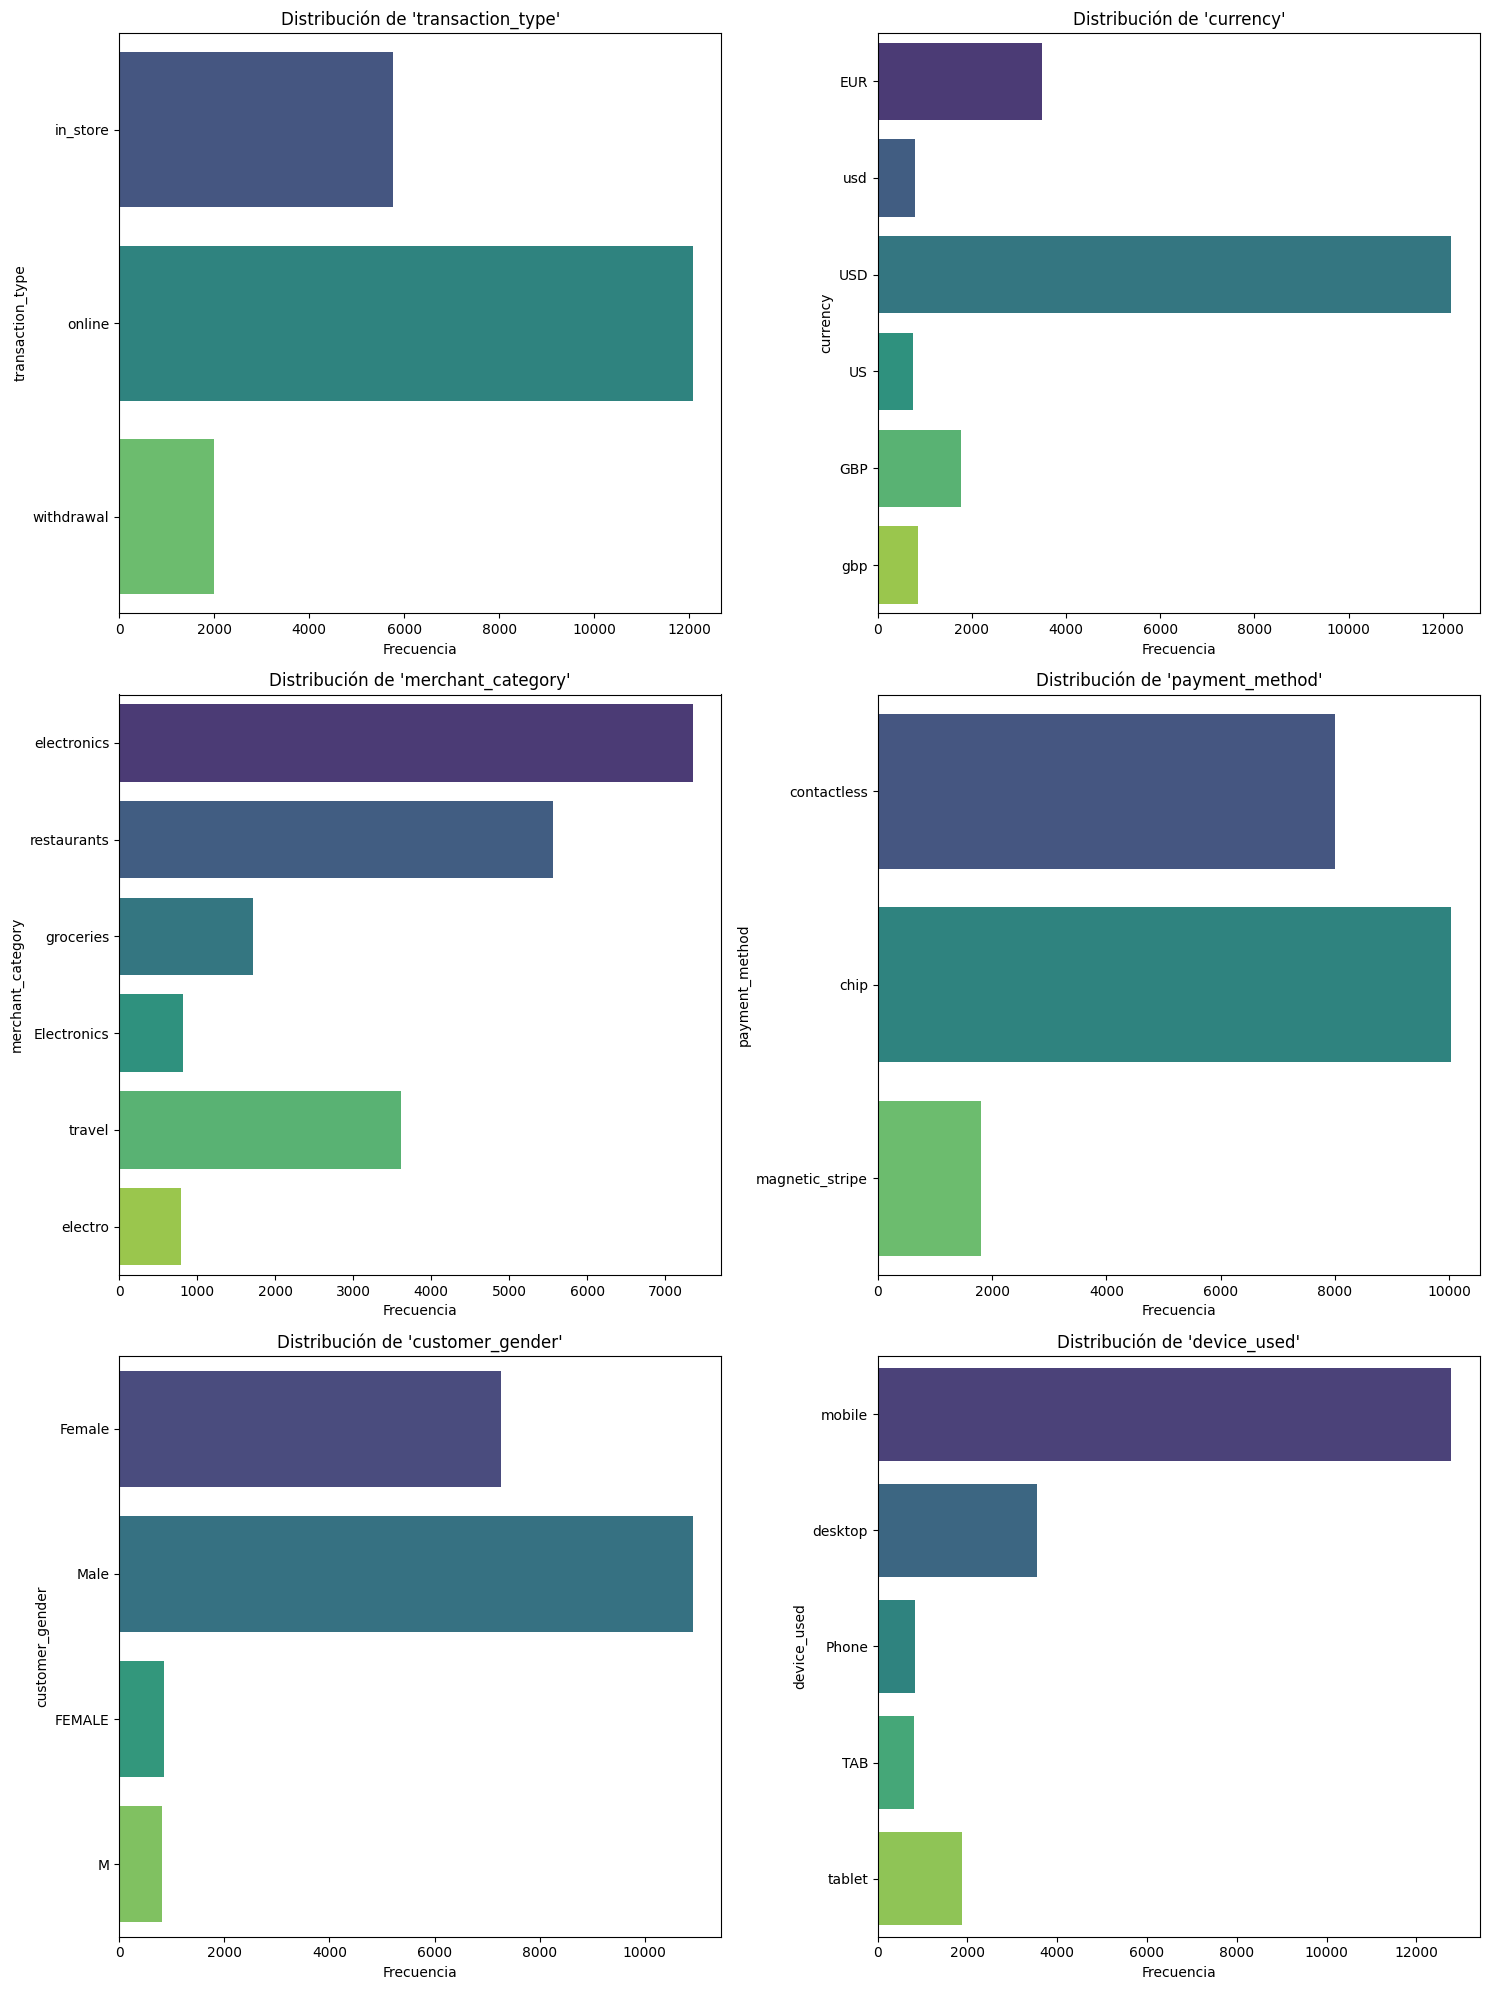

In [30]:
# Lista de columnas categóricas
columnas_categoricas = [
    'transaction_type', 'currency',
    'merchant_category', 'payment_method', 'customer_gender',
    'device_used'
]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))
axes = axes.flatten()
# Graficar la distribución de valores únicos en cada columna categórica
for i, columna in enumerate(columnas_categoricas):
    sns.countplot(y=Data[columna], ax=axes[i], palette="viridis")
    axes[i].set_title(f"Distribución de '{columna}'")
    axes[i].set_xlabel("Frecuencia")
    axes[i].set_ylabel(columna)
plt.tight_layout()
plt.show()

In [31]:
# Lista de columnas categóricas
columnas_categoricas = [
    'transaction_type', 'merchant_location', 'currency',
    'merchant_category', 'payment_method', 'customer_gender',
    'device_used'
]
# Mostrar valores únicos de cada columna categórica
for columna in columnas_categoricas:
    valores_unicos = Data[columna].unique()
    print(f"Valores únicos en '{columna}': {valores_unicos}")

Valores únicos en 'transaction_type': ['in_store' 'online' 'withdrawal']
Valores únicos en 'merchant_location': ['Lake Donna' 'West Kariburgh' 'East Kimberly' ... 'Port Connorbury'
 'Beckfort' 'Olsonburgh']
Valores únicos en 'currency': ['EUR' 'usd' 'USD' 'US' 'GBP' 'gbp']
Valores únicos en 'merchant_category': ['electronics' 'restaurants' 'groceries' 'Electronics' 'travel' 'electro']
Valores únicos en 'payment_method': ['contactless' 'chip' 'magnetic_stripe']
Valores únicos en 'customer_gender': ['Female' 'Male' 'FEMALE' 'M']
Valores únicos en 'device_used': ['mobile' 'desktop' 'Phone' 'TAB' 'tablet']


In [32]:
# Normalizar 'currency' (convertir a mayúsculas y unificar 'US' a 'USD')
Data['currency'] = Data['currency'].str.upper()
Data['currency'] = Data['currency'].replace({'US': 'USD'})


In [33]:
# Normalizar 'Gender' (convertir a mayúsculas y unificar 'M' a 'Male')
Data['customer_gender'] = Data['customer_gender'].str.lower()
Data['customer_gender'] = Data['customer_gender'].replace({'m': 'male'})



In [34]:
# Normalizar 'Merchant Category' (convertir a mayúsculas y unificar 'Electro' a 'Electronics')
Data['merchant_category'] = Data['merchant_category'].str.lower()
Data['merchant_category'] = Data['merchant_category'].replace('electro', 'electronics')

In [35]:
# Normalizar 'device_used' (convertir a mayúsculas y unificar 'US' a 'USD')
Data['device_used'] = Data['device_used'].str.lower()
Data['device_used'] = Data['device_used'].replace('phone', 'mobile')
Data['device_used'] = Data['device_used'].replace('tab', 'tablet')

C:\Users\QY539GE\AppData\Local\Temp\ipykernel_30940\3535318416.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=Data[columna], ax=axes[i], palette="viridis")
C:\Users\QY539GE\AppData\Local\Temp\ipykernel_30940\3535318416.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=Data[columna], ax=axes[i], palette="viridis")
C:\Users\QY539GE\AppData\Local\Temp\ipykernel_30940\3535318416.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=Data[columna], ax=axes[i], palette="viridis")
C:\Users\QY539GE\AppData\Local\Temp\ipykernel_309

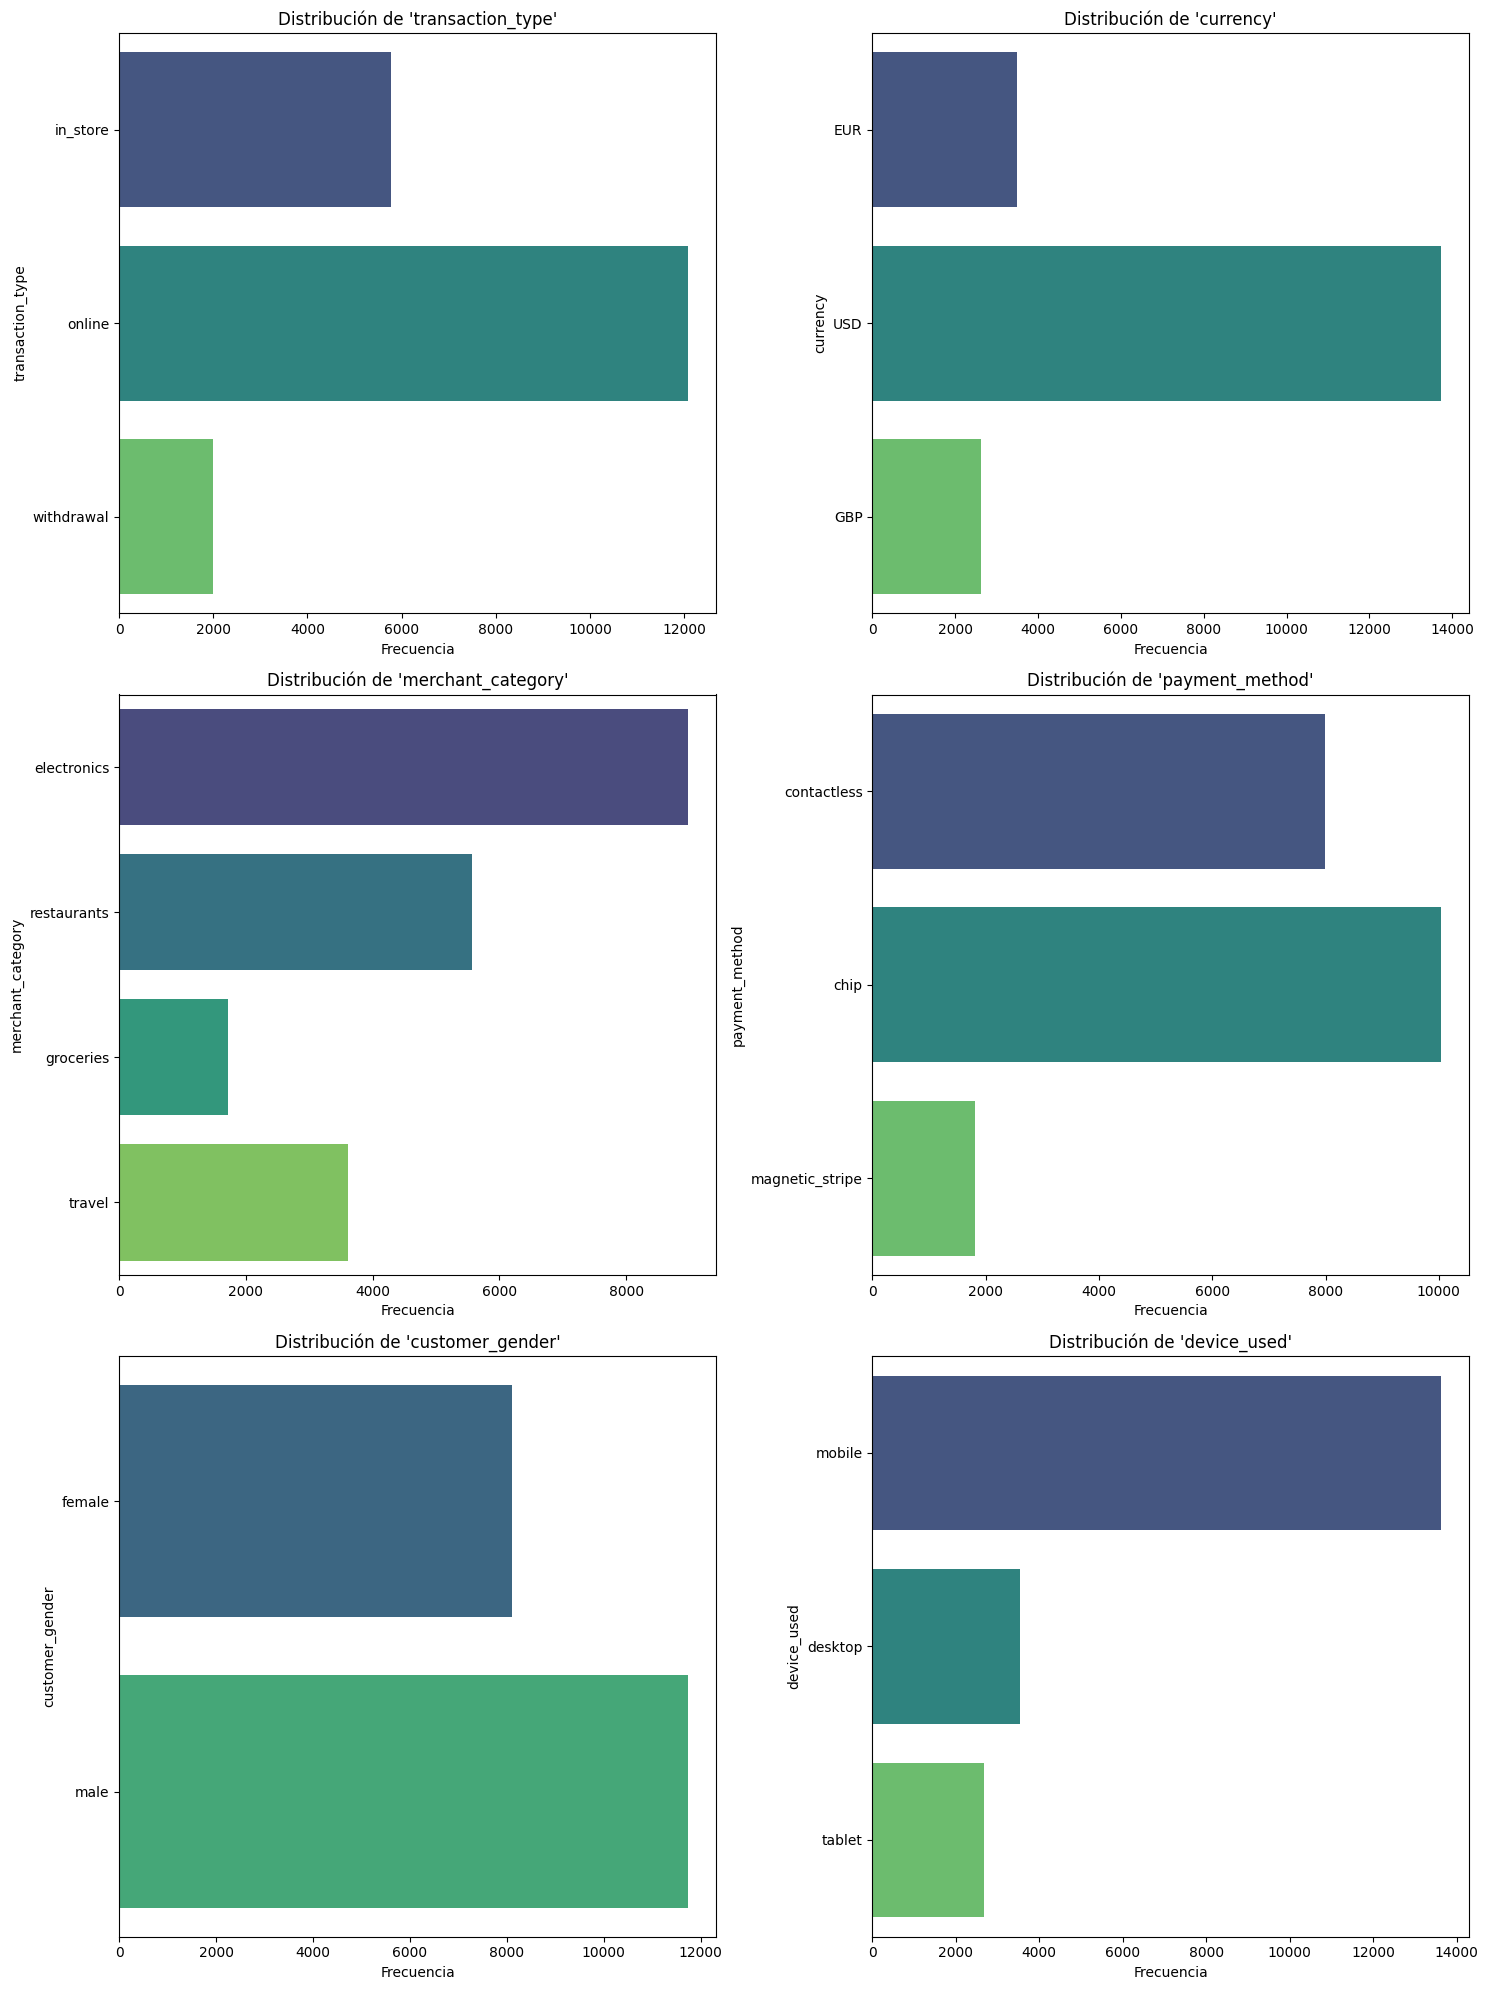

In [36]:
# Lista de columnas categóricas
columnas_categoricas = [
    'transaction_type', 'currency',
    'merchant_category', 'payment_method', 'customer_gender',
    'device_used'
]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))
axes = axes.flatten()
# Graficar la distribución de valores únicos en cada columna categórica
for i, columna in enumerate(columnas_categoricas):
    sns.countplot(y=Data[columna], ax=axes[i], palette="viridis")
    axes[i].set_title(f"Distribución de '{columna}'")
    axes[i].set_xlabel("Frecuencia")
    axes[i].set_ylabel(columna)
plt.tight_layout()
plt.show()

In [38]:
# Columnas numéricas a analizar
columnas_numericas = [
   'customer_age', 'monthly_spending_avg',
   'credit_limit', 'current_balance', 'transaction_frequency'
]

In [39]:
# Función para identificar outliers usando IQR
def detectar_outliers(columna):
    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = columna[(columna < limite_inferior) | (columna > limite_superior)]
    return outliers
# Identificar outliers en cada columna numérica
for columna in columnas_numericas:
    outliers = detectar_outliers(Data[columna])
    print(f"Número de outliers segun IQR en '{columna}': {len(outliers)}")
    print(f"Outliers en '{columna}': {outliers.values}\n")

Número de outliers segun IQR en 'customer_age': 244
Outliers en 'customer_age': [63. 65. 59. 66. 63. 58. 58. 67. 57. 64. 58. 67. 59. 62. 60. 57. 59. 60.
 61. 70. 61. 66. 58. 58. 58. 58. 63. 58. 57. 58. 59. 58. 69. 57. 57. 62.
 62. 64. 61. 57. 59. 59. 58. 60. 64. 58. 57. 59. 62. 57. 61. 61. 60. 66.
 57. 60. 58. 57. 67. 57. 66. 61. 65. 62. 58. 57. 62. 60. 58. 57. 67. 57.
 63. 60. 68. 64. 57. 63. 60. 57. 70. 59. 60. 59. 58. 57. 57. 60. 58. 59.
 58. 62. 62. 65. 58. 63. 58. 59. 59. 57. 59. 57. 59. 57. 59. 57. 60. 57.
 57. 60. 57. 63. 57. 61. 63. 60. 58. 58. 63. 57. 58. 57. 67. 63. 57. 59.
 58. 68. 61. 59. 57. 68. 57. 61. 57. 59. 59. 57. 63. 62. 57. 63. 65. 59.
 66. 63. 58. 58. 67. 57. 64. 58. 67. 59. 62. 60. 57. 59. 60. 61. 70. 61.
 66. 58. 58. 58. 58. 63. 58. 57. 58. 59. 58. 69. 57. 57. 62. 62. 64. 61.
 57. 59. 59. 58. 60. 64. 58. 57. 59. 62. 57. 61. 61. 60. 66. 57. 60. 58.
 57. 67. 57. 66. 61. 65. 62. 58. 57. 62. 60. 58. 57. 63. 65. 59. 66. 63.
 58. 58. 67. 57. 64. 58. 67. 59. 62. 60. 57.

In [40]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19845 entries, 0 to 19844
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   transaction_id         19845 non-null  int64  
 1   transaction_amount     19845 non-null  object 
 2   transaction_date       19845 non-null  object 
 3   transaction_type       19845 non-null  object 
 4   merchant_location      19845 non-null  object 
 5   currency               19845 non-null  object 
 6   merchant_id            19845 non-null  int64  
 7   merchant_category      19845 non-null  object 
 8   payment_method         19845 non-null  object 
 9   customer_id            19845 non-null  int64  
 10  customer_age           19845 non-null  float64
 11  customer_gender        19845 non-null  object 
 12  purchase_history       19845 non-null  int64  
 13  monthly_spending_avg   19845 non-null  float64
 14  credit_limit           19845 non-null  int64  
 15  current

In [44]:
# Convertir la columna 'transaction_date' a tipo datetime
Data['transaction_date'] = pd.to_datetime(Data['transaction_date'])
# Extraer componentes de la fecha
Data['transaction_year'] = Data['transaction_date'].dt.year
Data['transaction_month'] = Data['transaction_date'].dt.month
Data['transaction_day'] = Data['transaction_date'].dt.day
Data['transaction_hour'] = Data['transaction_date'].dt.hour
Data['transaction_minute'] = Data['transaction_date'].dt.minute
Data['transaction_dayofweek'] = Data['transaction_date'].dt.dayofweek  # Día de la semana (0 = Lunes, 6 = Domingo)
# Mostrar las primeras filas para verificar
Data[['transaction_date', 'transaction_year', 'transaction_month', 'transaction_day',
    'transaction_hour', 'transaction_minute', 'transaction_dayofweek']].head()

,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour,transaction_minute,transaction_dayofweek
0,2024-01-23 20:39:32,2024,1,23,20,39,1
1,2024-01-05 11:06:51,2024,1,5,11,6,4
2,2024-01-14 13:36:11,2024,1,14,13,36,6
3,2024-01-26 03:15:20,2024,1,26,3,15,4
4,2024-01-23 20:02:05,2024,1,23,20,2,1


In [46]:
Data.head(10)

,transaction_id,transaction_amount,transaction_date,transaction_type,merchant_location,currency,merchant_id,merchant_category,payment_method,customer_id,...,ip_address,device_used,transaction_frequency,is_fraud,transaction_year,transaction_month,transaction_day,transaction_hour,transaction_minute,transaction_dayofweek
0,1389,100.0,2024-01-23 20:39:32,in_store,Lake Donna,EUR,96971,electronics,contactless,5205,...,67.20.93.223,mobile,2,1,2024,1,23,20,39,1
1,23946,nan,2024-01-05 11:06:51,online,West Kariburgh,USD,88047,restaurants,contactless,3035,...,182.126.136.76,mobile,5,0,2024,1,5,11,6,4
2,8296,1000.0,2024-01-14 13:36:11,online,East Kimberly,USD,88312,groceries,chip,9982,...,179.9.25.40,desktop,7,1,2024,1,14,13,36,6
3,28145,836.010919100131,2024-01-26 03:15:20,withdrawal,Janeborough,USD,92701,electronics,chip,5327,...,129.174.89.31,mobile,2,0,2024,1,26,3,15,4
4,14861,54.17990548903373,2024-01-23 20:02:05,in_store,Lake Jessicaberg,EUR,89010,electronics,contactless,3078,...,26.125.0.149,mobile,5,0,2024,1,23,20,2,1
5,17402,nan,2024-01-24 17:56:19,in_store,Emilychester,USD,60984,travel,chip,6930,...,48.38.244.122,mobile,4,1,2024,1,24,17,56,2
6,4851,8495.724782070563,2024-01-13 09:44:03,in_store,Jonesview,GBP,32060,restaurants,chip,9073,...,10.196.60.192,desktop,4,0,2024,1,13,9,44,5
7,853,1500.0,2024-01-12 00:39:20,online,Palmerland,USD,39059,restaurants,chip,5475,...,8.162.129.196,desktop,3,1,2024,1,12,0,39,4
8,25874,484.11935235848694,2024-01-08 23:10:10,online,NA,GBP,72787,electronics,chip,2815,...,88.233.109.150,mobile,5,0,2024,1,8,23,10,0
9,17287,nan,2024-01-21 05:22:37,in_store,Lake Chloemouth,USD,60705,groceries,magnetic_stripe,6987,...,163.175.81.24,desktop,4,1,2024,1,21,5,22,6


In [47]:
Data.info

<bound method DataFrame.info of        transaction_id  transaction_amount    transaction_date  \
0                1389               100.0 2024-01-23 20:39:32   
1               23946                 nan 2024-01-05 11:06:51   
2                8296              1000.0 2024-01-14 13:36:11   
3               28145    836.010919100131 2024-01-26 03:15:20   
4               14861   54.17990548903373 2024-01-23 20:02:05   
...               ...                 ...                 ...   
19840           19420   686.1678242250443 2024-03-12 00:12:32   
19841            5333   2158.867501495527 2024-03-05 06:46:24   
19842           25243  1626.1037996705768 2024-03-13 03:45:18   
19843           25650   929.8158777378828 2024-03-02 04:10:40   
19844           15556                 nan 2024-03-14 16:56:26   

      transaction_type merchant_location currency  merchant_id  \
0             in_store        Lake Donna      EUR        96971   
1               online    West Kariburgh      USD      